TASK-04: Image to Pencil Sketch with Python

By: Junaid Shaik

In [1]:
#Importing Packages
import cv2
import numpy as np
import plotly.express as px

In [2]:
img = cv2.imread(r'butterfly.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


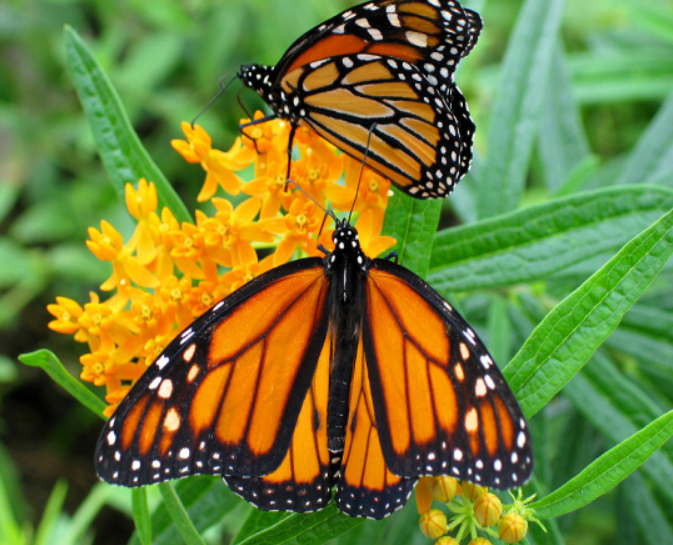

In [3]:
imgs=px.imshow(img)
#imgs.update_layout(width=990, height=600 ,margin=dict(l=20, r=20, b=10, t=10))
imgs.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
imgs.show()

Resizing image shape


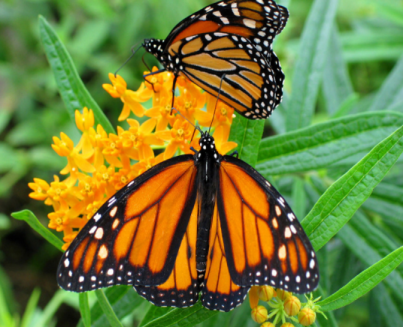

In [4]:
scale_percent = 0.60
width = int(img.shape[1]*scale_percent)
height = int(img.shape[0]*scale_percent)
dim = (width,height)
resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
res=px.imshow(resized)
res.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
res.show()

Sharpening Image

In [5]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(resized,-1,kernel_sharpening)


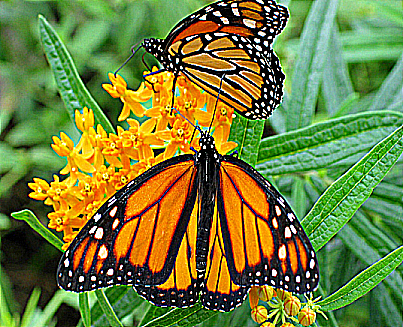

In [6]:
sharp=px.imshow(sharpened)
sharp.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sharp.show()

Converting an image into gray_scale image

In [7]:
grayscale = cv2.cvtColor(sharpened , cv2.COLOR_BGR2GRAY)
gray = px.imshow(grayscale, color_continuous_scale='gray')
gray.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gray.show()

Inverting the image

In [8]:
invs = 255-grayscale
inv=px.imshow(invs,color_continuous_scale='gray')
inv.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
inv.show()

Smoothing the image

In [9]:
gauss = cv2.GaussianBlur(invs,ksize=(15,15),sigmaX=0,sigmaY=0)
gaus=px.imshow(gauss,color_continuous_scale='gray')
gaus.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gaus.show()

Obtaining the final sketch

In [10]:
def dodgeV2(image,mask):
    return cv2.divide(image,255-mask,scale=256)

pencil_img = dodgeV2(grayscale,gauss)

In [11]:
sketch=px.imshow(pencil_img,color_continuous_scale='gray')
#sketch.update_layout(width=990, height=600 ,margin=dict(l=20, r=20, b=10, t=10))
sketch.update_layout(coloraxis_showscale=False)
sketch.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sketch.show()